#Stock recommendation system based on five technical analysis indicators.
Here is a version for a randomly selected company from the S&P 500 index. The full version with a choice of companies, period and interval is available on the Streamlit server.

In [ ]:
#!pip install yfinance
#!pip install pandas_ta

import yfinance as yf
import pandas as pd
import random
import matplotlib.pyplot as plt
import pandas_ta as ta

In [2]:
dfs = pd.read_html("https://en.wikipedia.org/wiki/List_of_S%26P_500_companies")
list_of_stocks = dfs[0].Symbol
list_of_stocks.head()

0     MMM
1     AOS
2     ABT
3    ABBV
4    ABMD
Name: Symbol, dtype: object

In [3]:
len(list_of_stocks)

504

In [4]:
ticker = random.choice(list_of_stocks)
ticker

'CBOE'

In [5]:
stock = yf.Ticker(ticker)
stock.history().head(3)

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2022-03-14,114.940002,116.360001,113.080002,113.720001,713000,0,0
2022-03-15,113.209999,114.750000,111.760002,114.330002,874100,0,0
2022-03-16,114.650002,115.889999,113.529999,115.230003,745800,0,0


In [6]:
stock.history().isna().sum().sum()

0

In [33]:
#stock.earnings

In [8]:
stock_name = stock.info['longName']

In [9]:
period = "1y"
interval = "1d"
# valid periods: 1d,5d,1mo,3mo,6mo,1y,2y,5y,10y,ytd,max
# valid intervals: 1m,2m,5m,15m,30m,60m,90m,1h,1d,5d,1wk,1mo,3mo
stock_price = stock.history(period=period,interval=interval).drop(['Stock Splits', 'Dividends'], axis=1)

#stock_price = stock.history().Close
#stock_volume = stock.history(period=period,interval=interval).Volume


#Stock price and volume.

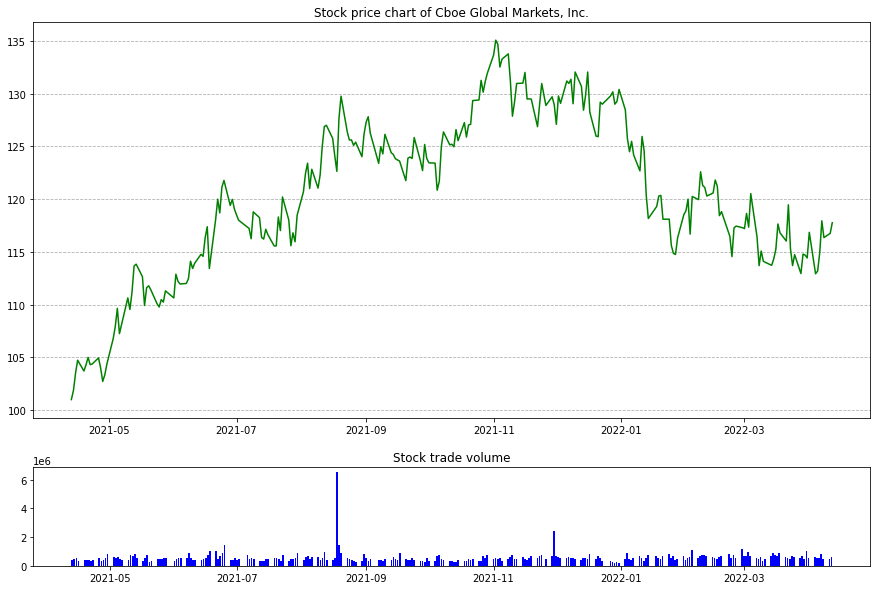

In [10]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15,10), gridspec_kw={'height_ratios': [4, 1]})
ax1.set(title="Stock price chart of "+stock_name)
ax1.plot(stock_price.index, stock_price.Close, color="g")
ax1.grid(axis='y', ls='--')
ax2.set(title="Stock trade volume")
ax2.bar(stock_price.index, stock_price.Volume, color="blue")
plt.show()

In [11]:
# sma_range = [10,30,100]
# for sma in sma_range:
#   stock_price[f'SMA_{sma}'] = stock_price['Close'].rolling(sma).mean()

In [12]:
# fig, ax = plt.subplots(figsize=(15,7))
# ax.plot(stock_price.index, stock_price.Close, label="Closing price")
# for sma in sma_range:
#   ax.plot(stock_price.index, stock_price[f'SMA_{sma}'], label=f"SMA {sma}")
# ax.grid(axis='y', ls='--')
# plt.legend(loc="upper left")
# plt.show()

#Exponentially Weighted Moving Average

In [13]:
ewma_range = [10,30,100]
for ewma in ewma_range:
  stock_price[f'EWMA_{ewma}'] = stock_price['Close'].ewm(span=ewma, adjust=False).mean()

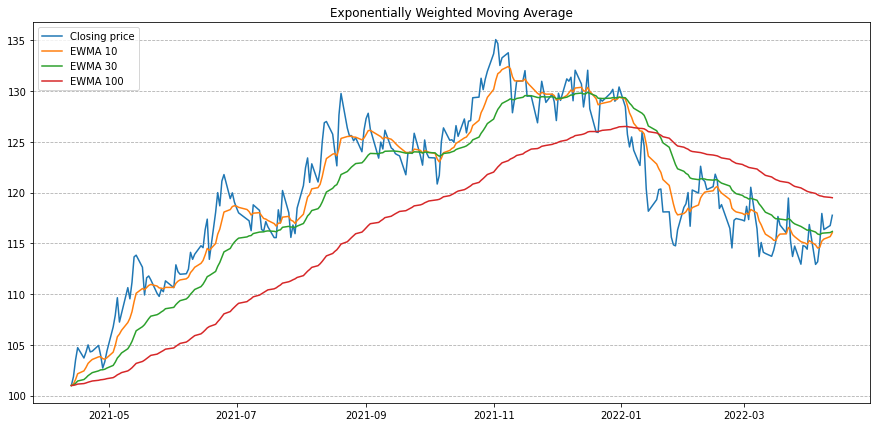

In [37]:
fig, ax = plt.subplots(figsize=(15,7))
ax.plot(stock_price.index, stock_price.Close, label="Closing price")

for ewma in ewma_range:
  ax.plot(stock_price.index, stock_price[f'EWMA_{ewma}'], label=f"EWMA {ewma}")

ax.grid(axis='y', ls='--')
ax.set_title("Exponentially Weighted Moving Average")
plt.legend(loc="upper left")
plt.show()

In [15]:
stock_price.head()

,Open,High,Low,Close,Volume,EWMA_10,EWMA_30,EWMA_100
Date,,,,,,,,
2021-04-13,100.680000,102.480003,100.480003,100.989998,373100,100.989998,100.989998,100.989998
2021-04-14,101.529999,102.949997,100.690002,101.860001,499300,101.148180,101.046127,101.007226
2021-04-15,101.449997,104.690002,101.449997,103.500000,534000,101.575784,101.204441,101.056588
2021-04-16,104.370003,104.760002,103.300003,104.720001,365500,102.147460,101.431252,101.129130
2021-04-19,104.139999,105.360001,102.660004,103.699997,397100,102.429739,101.577622,101.180039


#Relative Strength Index (RSI)

In [16]:
stock_price['RSI_14']=ta.rsi(stock_price['Close'],lenght=14)

In [17]:
hor70=[70 for price in stock_price['RSI_14']]
hor30=[30 for price in stock_price['RSI_14']]

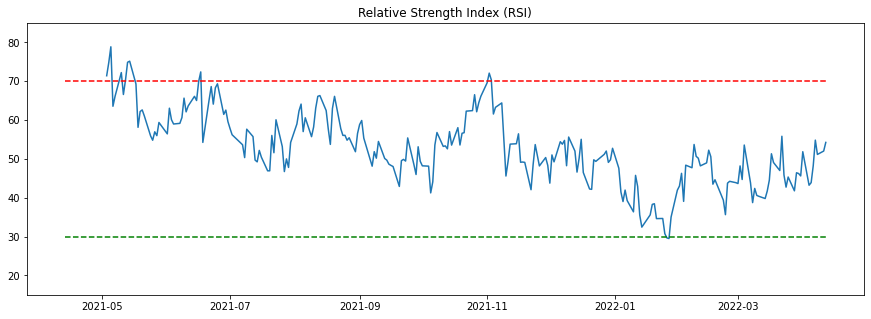

In [38]:
fig, ax = plt.subplots(figsize=(15,5))
ax.plot(stock_price.index, stock_price['RSI_14'])
ax.plot(stock_price.index, hor70, ls='--',c='r')
ax.plot(stock_price.index, hor30, ls='--',c='g')
ax.set_title('Relative Strength Index (RSI)')
plt.ylim(15,85)

plt.show()

In [19]:
stock_price.ta.indicators()

Pandas TA - Technical Analysis Indicators - v0.3.14b0
Total Indicators & Utilities: 205
Abbreviations:
    aberration, above, above_value, accbands, ad, adosc, adx, alma, amat, ao, aobv, apo, aroon, atr, bbands, below, below_value, bias, bop, brar, cci, cdl_pattern, cdl_z, cfo, cg, chop, cksp, cmf, cmo, coppock, cross, cross_value, cti, decay, decreasing, dema, dm, donchian, dpo, ebsw, efi, ema, entropy, eom, er, eri, fisher, fwma, ha, hilo, hl2, hlc3, hma, hwc, hwma, ichimoku, increasing, inertia, jma, kama, kc, kdj, kst, kurtosis, kvo, linreg, log_return, long_run, macd, mad, massi, mcgd, median, mfi, midpoint, midprice, mom, natr, nvi, obv, ohlc4, pdist, percent_return, pgo, ppo, psar, psl, pvi, pvo, pvol, pvr, pvt, pwma, qqe, qstick, quantile, rma, roc, rsi, rsx, rvgi, rvi, short_run, sinwma, skew, slope, sma, smi, squeeze, squeeze_pro, ssf, stc, stdev, stoch, stochrsi, supertrend, swma, t3, td_seq, tema, thermo, tos_stdevall, trima, trix, true_range, tsi, tsignals, ttm_trend, ui, 

# Moving Average Convergence / Divergence (MACD)

In [20]:
MACD = ta.macd(stock_price['Close'],fast=12, slow=26, signal=9)
stock_price = pd.concat([stock_price,MACD],axis=1)

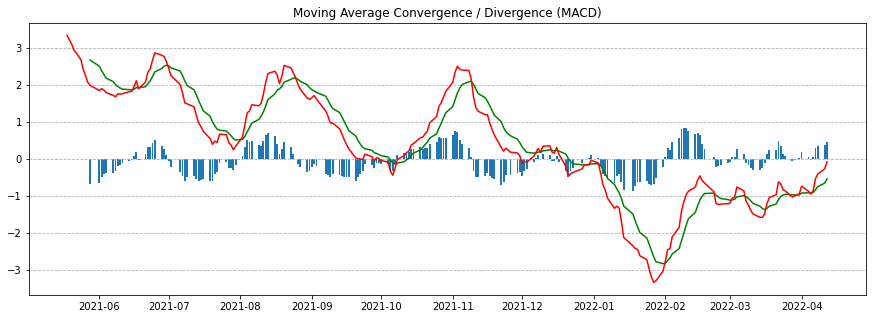

In [39]:
fig, ax = plt.subplots(figsize=(15,5))
ax.bar(stock_price.index, stock_price['MACDh_12_26_9'])
ax.plot(stock_price.index, stock_price['MACDs_12_26_9'],c='g')
ax.plot(stock_price.index, stock_price['MACD_12_26_9'],c='r')
ax.grid(axis='y', ls='--')
ax.set_title('Moving Average Convergence / Divergence (MACD)')

plt.show()

#Stochastic Oscillator

In [22]:
STOCH = ta.stoch(high=stock_price.High,low=stock_price.Low,close=stock_price.Close)
stock_price = pd.concat([stock_price, STOCH], axis=1)

In [23]:
hor80=[80 for price in stock_price['STOCHd_14_3_3']]
hor20=[20 for price in stock_price['STOCHd_14_3_3']]

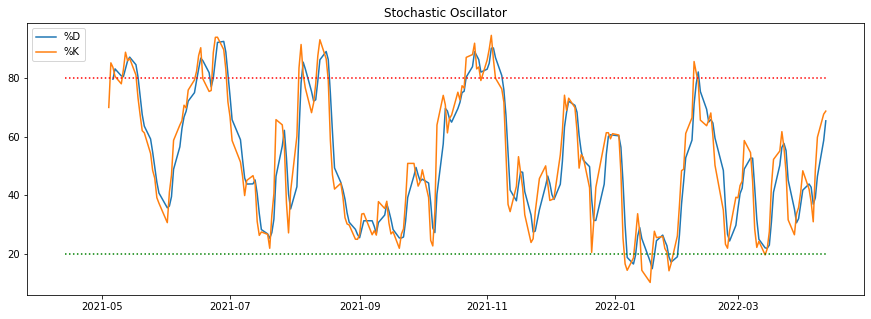

In [40]:
fig, ax = plt.subplots(figsize=(15,5))
ax.plot(stock_price.index, stock_price['STOCHd_14_3_3'], label='%D')
ax.plot(stock_price.index, stock_price['STOCHk_14_3_3'], label='%K')
ax.plot(stock_price.index, hor20, ls=':',c='g')
ax.plot(stock_price.index, hor80, ls=':',c='r')
ax.set_title('Stochastic Oscillator')

plt.legend(loc='upper left')
plt.show()

#Bollinger Bands

In [25]:
bbands = ta.bbands(stock_price.Close, length=20, std=2)
bbands.tail(2)

,BBL_20_2.0,BBM_20_2.0,BBU_20_2.0,BBB_20_2.0,BBP_20_2.0
Date,,,,,
2022-04-11,112.017277,115.4470,118.876724,5.941642,0.689957
2022-04-12,112.087804,115.6185,119.149196,6.107493,0.803269


In [26]:
stock_price = pd.concat([stock_price,bbands], axis=1)

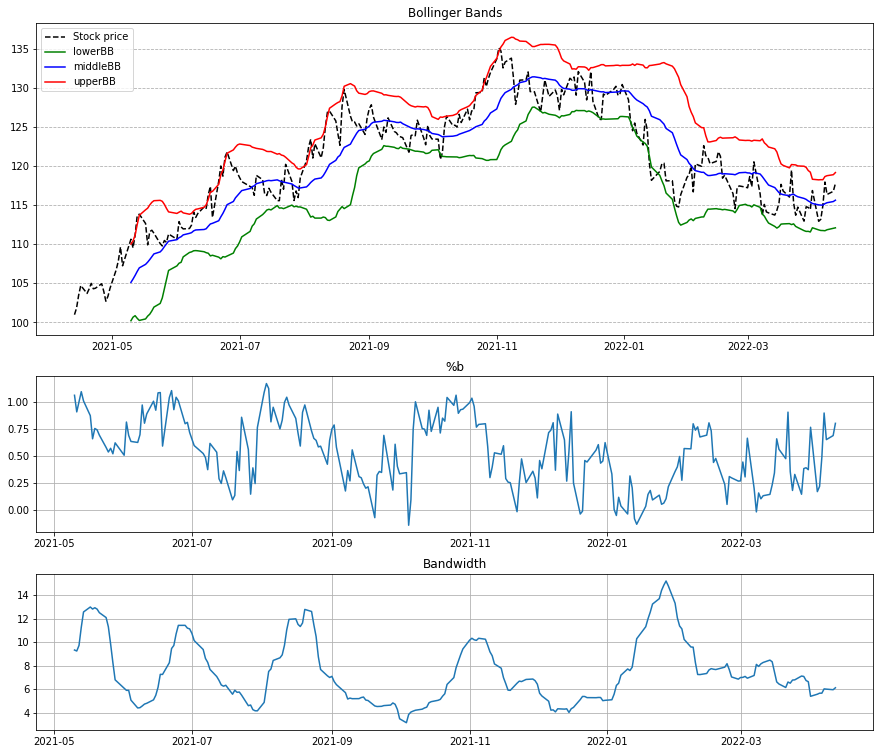

In [36]:
fig, (ax1, ax2, ax3) = plt.subplots(3,1, figsize=(15,13), gridspec_kw={'height_ratios': [2, 1, 1]})

ax1.plot(stock_price.Close, ls='--', c='k', label='Stock price')
ax1.plot(stock_price['BBL_20_2.0'], c='g', label = 'lowerBB')
ax1.plot(stock_price['BBM_20_2.0'], c='b', label = 'middleBB')
ax1.plot(stock_price['BBU_20_2.0'], c='r', label = 'upperBB')
ax1.legend(loc='upper left')
ax1.grid(axis='y', ls='--')
ax1.set_title('Bollinger Bands')

ax2.plot(stock_price['BBP_20_2.0'])
ax2.grid()
ax2.set_title('%b')

ax3.plot(stock_price['BBB_20_2.0'])
ax3.grid()
ax3.set_title('Bandwidth')

plt.show()

In [28]:
#help(ta.ichimoku)
# ichi_now, ichi_fut = ta.ichimoku(high=stock_price.High,low=stock_price.Low,close=stock_price.Close)
# fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,4))
# fig.autofmt_xdate()
# ax1.plot(ichi_now)
# ax2.plot(ichi_fut)
# plt.show()

# Recommendataion output


In [29]:
stock_price.columns

Index(['Open', 'High', 'Low', 'Close', 'Volume', 'EWMA_10', 'EWMA_30',
       'EWMA_100', 'RSI_14', 'MACD_12_26_9', 'MACDh_12_26_9', 'MACDs_12_26_9',
       'STOCHk_14_3_3', 'STOCHd_14_3_3', 'BBL_20_2.0', 'BBM_20_2.0',
       'BBU_20_2.0', 'BBB_20_2.0', 'BBP_20_2.0'],
      dtype='object')

In [30]:
names = ["EWMA", "RSI", "MACD", "STOCH", "BBounds"]
def stock_recommendation(stock):
    signals = []
    #EWMA
    if (stock[-1:]['EWMA_10'] > stock[-1:]['EWMA_30']).bool() and (stock[-1:]['EWMA_30'] > stock[-1:]['EWMA_100']).bool():
        signals.append(1)
    elif (stock[-1:]['EWMA_10'] < stock[-1:]['EWMA_30']).bool() and (stock[-1:]['EWMA_30'] < stock[-1:]['EWMA_100']).bool():
        signals.append(-1)
    else:
        signals.append(0)
    #RSI
    if (stock[-1:]['RSI_14'] > 70).bool():
        signals.append(-1)
    elif (stock[-1:]['RSI_14'] < 30).bool():
        signals.append(1)
    else:
        signals.append(0)
    #MACD
    if (stock[-1:]['MACDh_12_26_9'] > 0).bool():
        signals.append(1)
    else:
        signals.append(-1)
    #STOCH
    if (stock[-1:]['STOCHk_14_3_3'] > 80).bool() or (stock[-1:]['STOCHd_14_3_3'] > 80).bool():
        signals.append(-1)
    elif (stock[-1:]['STOCHk_14_3_3'] < 20).bool() or (stock[-1:]['STOCHd_14_3_3'] < 20).bool():
        signals.append(1)
    else:
        signals.append(0)
    #BBounds
    if (stock[-1:]['Close'] < stock[-1:]['BBL_20_2.0']).bool():
        signals.append(1)
    elif (stock[-1:]['Close'] > stock[-1:]['BBU_20_2.0']).bool():
        signals.append(-1)
    else: 
        signals.append(0)

    return signals


In [35]:
recommendation = stock_recommendation(stock_price)
print("Results from individual sub-strategies (-1 = sell, 0 = neutral, 1 = buy): ")
for i in range(len(names)):
    print(names[i], recommendation[i])
print("Final reccomendation score: ", sum(recommendation))


Results from individual sub-strategies (-1 = sell, 0 = neutral, 1 = buy): 
EWMA -1
RSI 0
MACD 1
STOCH 0
BBounds 0
Final reccomendation score:  0


In [34]:
if sum(recommendation) >= 1:
    print("You can consider buying this stock.")
elif sum(recommendation) <= -1:
    print("You can consider short selling this stock")
else:
    print("Signal is neutral. You can consider looking for a better alternative.")

Signal is neutral. You can consider looking for a better alternative.
